### IMPORT DEPENDENCIES 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns                                                
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

                           
from ipywidgets import *


### PRE - PROCESSING

In [ ]:
heart = pd.read_csv('https://raw.githubusercontent.com/Brijal977/rijal_C964_heart_check/main/heart_Disease_PKI.csv')
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
heart.shape
list(heart)
heart.info()
heart.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
le_sex = LabelEncoder()
heart['Sex']=le_sex.fit_transform(heart['Sex'])
print('Sex' ,list(le_sex.classes_),':', le_sex.transform(['Female', 'Male']))


le_race = LabelEncoder()
heart['Race']=le_race.fit_transform(heart['Race'])
print('Race :' ,list(le_race.classes_),':',le_race.transform(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']))


le_smoking = LabelEncoder()
heart['Smoking']=le_smoking.fit_transform(heart['Smoking'])
print('Smoking :' ,list(le_smoking.classes_),':',le_smoking.transform(['No', 'Yes']))

le_agecat= LabelEncoder()
heart['AgeCategory']=le_agecat.fit_transform(heart['AgeCategory'])
print('AgeCategory :' ,list(le_agecat.classes_),':',le_agecat.transform(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']))


le_DW= LabelEncoder()
heart['DiffWalking']=le_DW.fit_transform(heart['DiffWalking'])
print('DiffWalking :' ,list(le_DW.classes_),':',le_DW.transform(['No', 'Yes']))


le_PhA = LabelEncoder()
heart['PhysicalActivity']=le_PhA.fit_transform(heart['PhysicalActivity'])
print('PhysicalActivity :' ,list(le_PhA.classes_),':',le_PhA.transform(['No', 'Yes']))

le_GH = LabelEncoder()
heart['GenHealth']=le_GH.fit_transform(heart['GenHealth'])
print('GenHealth :' ,list(le_GH.classes_),':',le_GH.transform(['Excellent', 'Fair', 'Good', 'Poor', 'Very good']))


heart['HeartDisease']=le.fit_transform(heart['HeartDisease'])
print('HeartDisease :' ,list(le.classes_),':', le.transform(['No', 'Yes']))


le_stroke = LabelEncoder()
heart['Stroke']=le_stroke.fit_transform(heart['Stroke'])
print('Stroke :' , list(le_stroke.classes_),':',le_stroke.transform(['No', 'Yes']))

le_diabet = LabelEncoder()
heart['Diabetic']=le_diabet.fit_transform(heart['Diabetic'])
print('Diabetic :' ,list(le_diabet.classes_),':',le_diabet.transform(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']))

le_asthma = LabelEncoder()
heart['Asthma']=le_asthma.fit_transform(heart['Asthma'])
print('Asthma :' ,list(le_asthma.classes_),':',le_asthma.transform(['No', 'Yes']))

le_skincan = LabelEncoder()
heart['SkinCancer']=le_skincan.fit_transform(heart['SkinCancer'])
print('SkinCancer :' ,list(le_skincan.classes_),':',le_skincan.transform(['No', 'Yes']))

le_PhA = LabelEncoder()
heart['AlcoholDrinking']=le.fit_transform(heart['AlcoholDrinking'])
print('AlcoholDrinking :' ,list(le.classes_),':',le.transform(['No', 'Yes']))

le_KD = LabelEncoder()
heart['KidneyDisease']=le_KD.fit_transform(heart['KidneyDisease'])
print('KidneyDisease :' ,list(le_KD.classes_),':',le.transform(['No', 'Yes']))

Sex ['Female', 'Male'] : [0 1]
Race : ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White'] : [0 1 2 3 4 5]
Smoking : ['No', 'Yes'] : [0 1]
AgeCategory : ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'] : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
DiffWalking : ['No', 'Yes'] : [0 1]
PhysicalActivity : ['No', 'Yes'] : [0 1]
GenHealth : ['Excellent', 'Fair', 'Good', 'Poor', 'Very good'] : [0 1 2 3 4]
HeartDisease : ['No', 'Yes'] : [0 1]
Stroke : ['No', 'Yes'] : [0 1]
Diabetic : ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'] : [0 1 2 3]
Asthma : ['No', 'Yes'] : [0 1]
SkinCancer : ['No', 'Yes'] : [0 1]
AlcoholDrinking : ['No', 'Yes'] : [0 1]
KidneyDisease : ['No', 'Yes'] : [0 1]


In [ ]:
heart.head(10)
heart.Sex.value_counts()
heart.describe
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

###VISUALIZATIONS

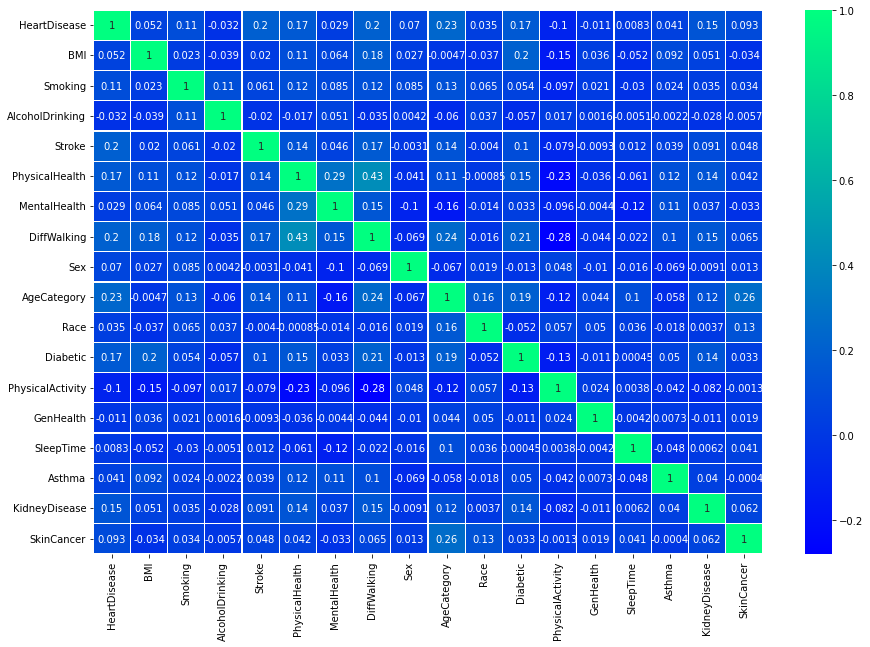

<Figure size 432x288 with 0 Axes>

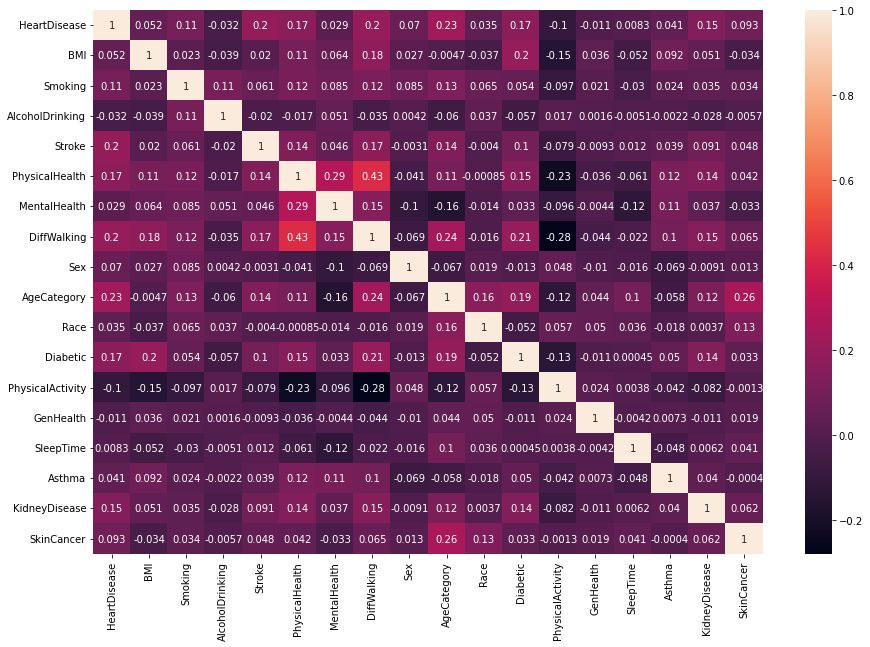

In [ ]:
#visual 1 
#Correlation Matrix 
# Visulaizing the data features to find the correlation between them which will infer the important features.

plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')


# Let's make our correlation matrix (pearson correlation)
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(method='pearson', min_periods=1),annot=True)

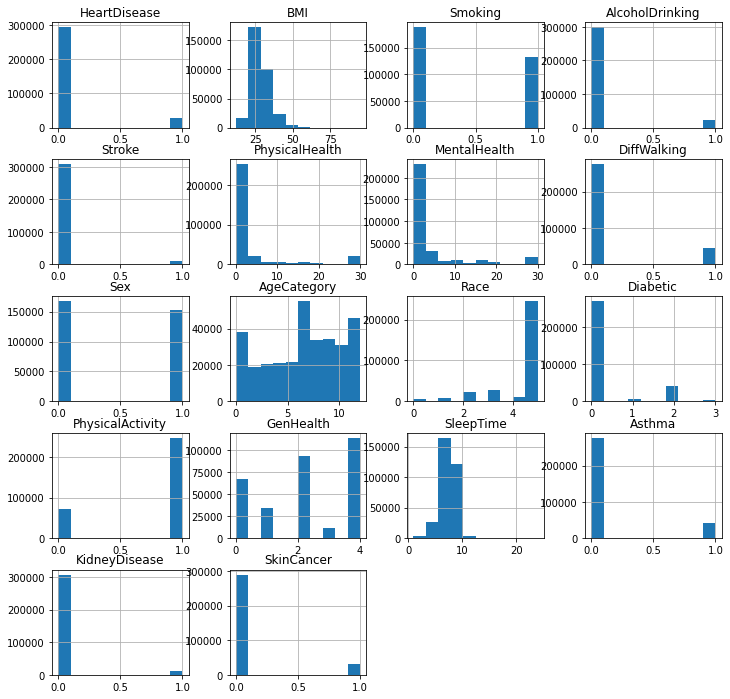

In [ ]:
#visual 2
# the relation between each features distribution with the help of histogram.
heart.hist(figsize=(12,12))
plt.savefig('featuresplot')


In [ ]:
#get feathers
X = heart.drop(['HeartDisease'], axis=1)
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [ ]:
#get target
Y = heart['HeartDisease']
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

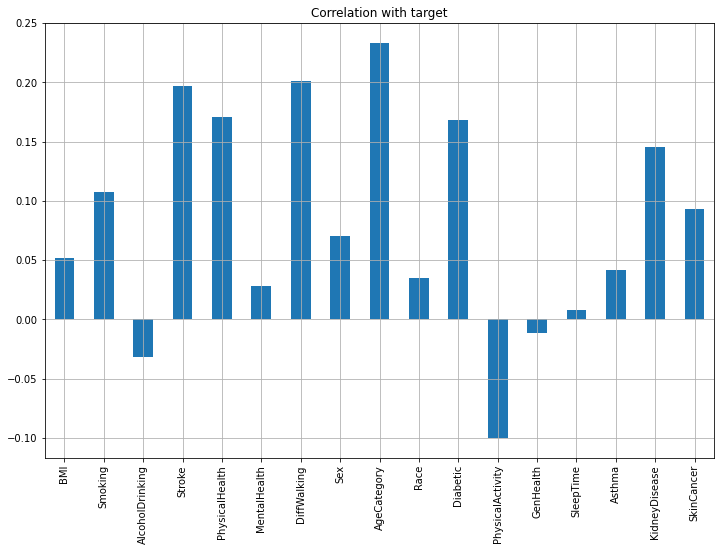

In [ ]:
#visual 3
X.corrwith(Y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [ ]:
#visual 4 - function
#Pie Chart - fx

def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
  
    ax = heart[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)


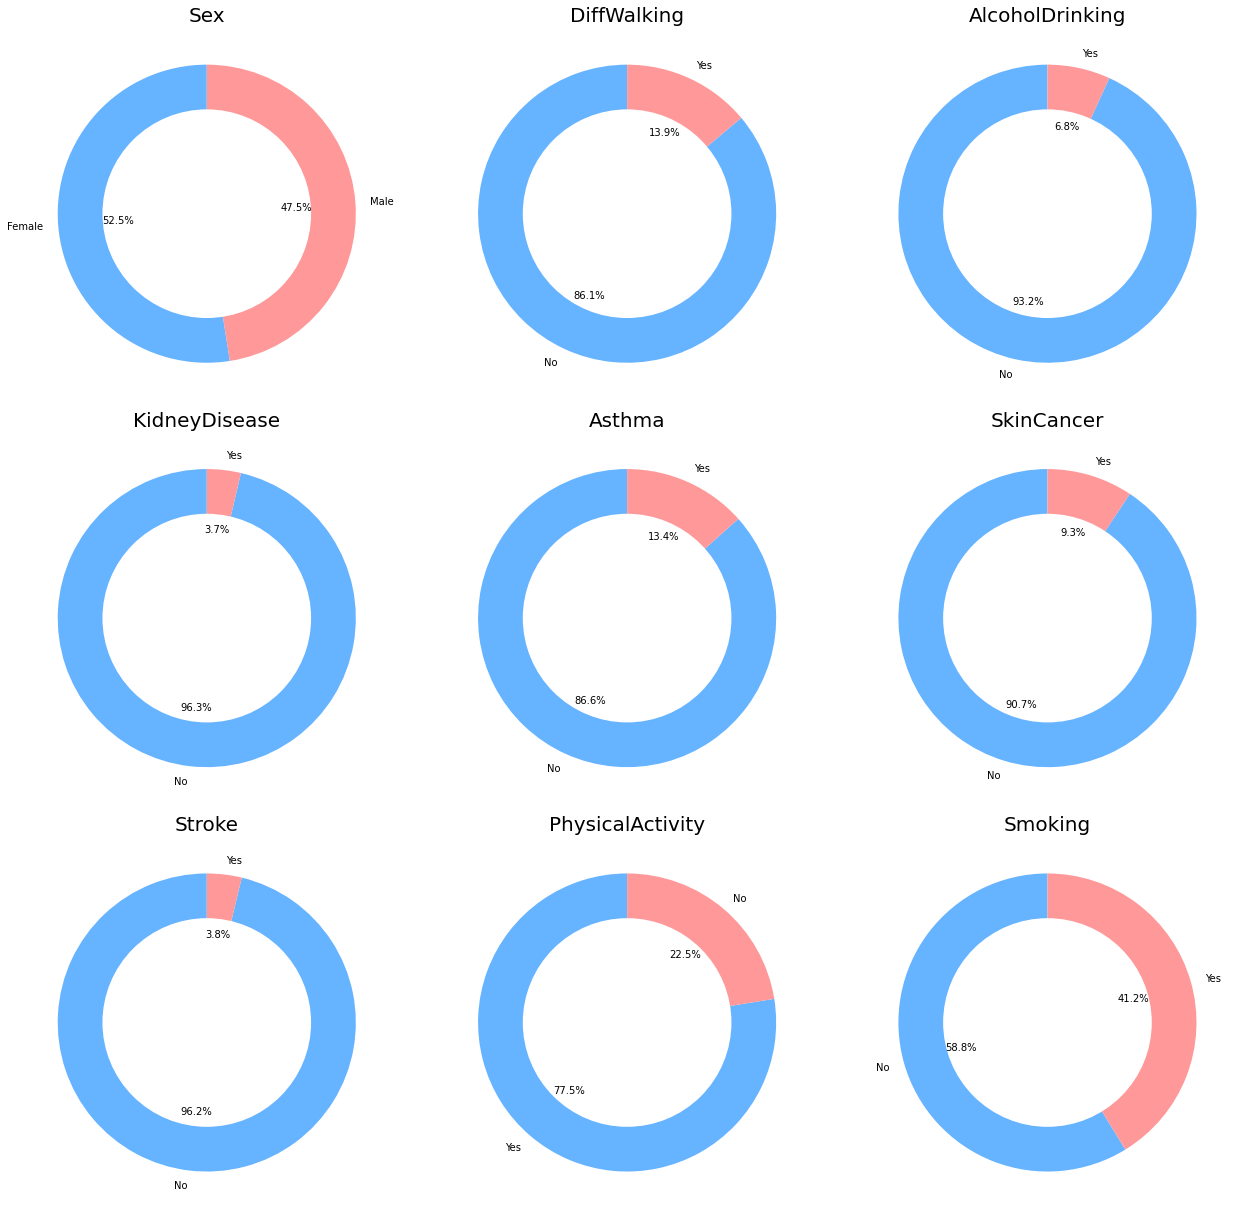

In [ ]:
#visual 4 
#Pie Chart

fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(heart, 'Sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(heart, 'DiffWalking', fig, {0: 'No', 1: 'Yes'}, 'DiffWalking')

# Draw Sex Pie chart
#plt.subplot(grid_rows, grid_cols, 2)
#draw_semi_pie_chart(heart, 'Race', fig, {0: 'American Indian/Alaskan Native', 1: 'Asian', 2: 'Black', 3: 'Hispanic', 4: 'Other', 5: 'White'}, 'Race')

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(heart, 'AlcoholDrinking', fig, {0: 'No', 1: 'Yes'}, 'AlcoholDrinking')
# Draw Sex Pie chart

plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(heart, 'KidneyDisease', fig, {0: 'No', 1: 'Yes'}, 'KidneyDisease')

plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(heart, 'Asthma', fig, {0: 'No', 1: 'Yes'}, 'Asthma')

plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(heart, 'SkinCancer', fig, {0: 'No', 1: 'Yes'}, 'SkinCancer')

plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(heart, 'Stroke', fig, {0: 'No', 1: 'Yes'}, 'Stroke')

plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(heart, 'PhysicalActivity', fig, {0: 'No', 1: 'Yes'}, 'PhysicalActivity')

plt.subplot(grid_rows, grid_cols, 9)
draw_semi_pie_chart(heart, 'Smoking', fig, {0: 'No', 1: 'Yes'}, 'Smoking')


#plt.subplot(grid_rows, grid_cols, 2)
#draw_semi_pie_chart(heart, 'Diabetic', fig, {0: 'No', 1: 'No, borderline diabetes', 3: 'Yes', 4: 'Yes (during pregnancy)'}, 'Diabetic')

fig.tight_layout()
plt.show()

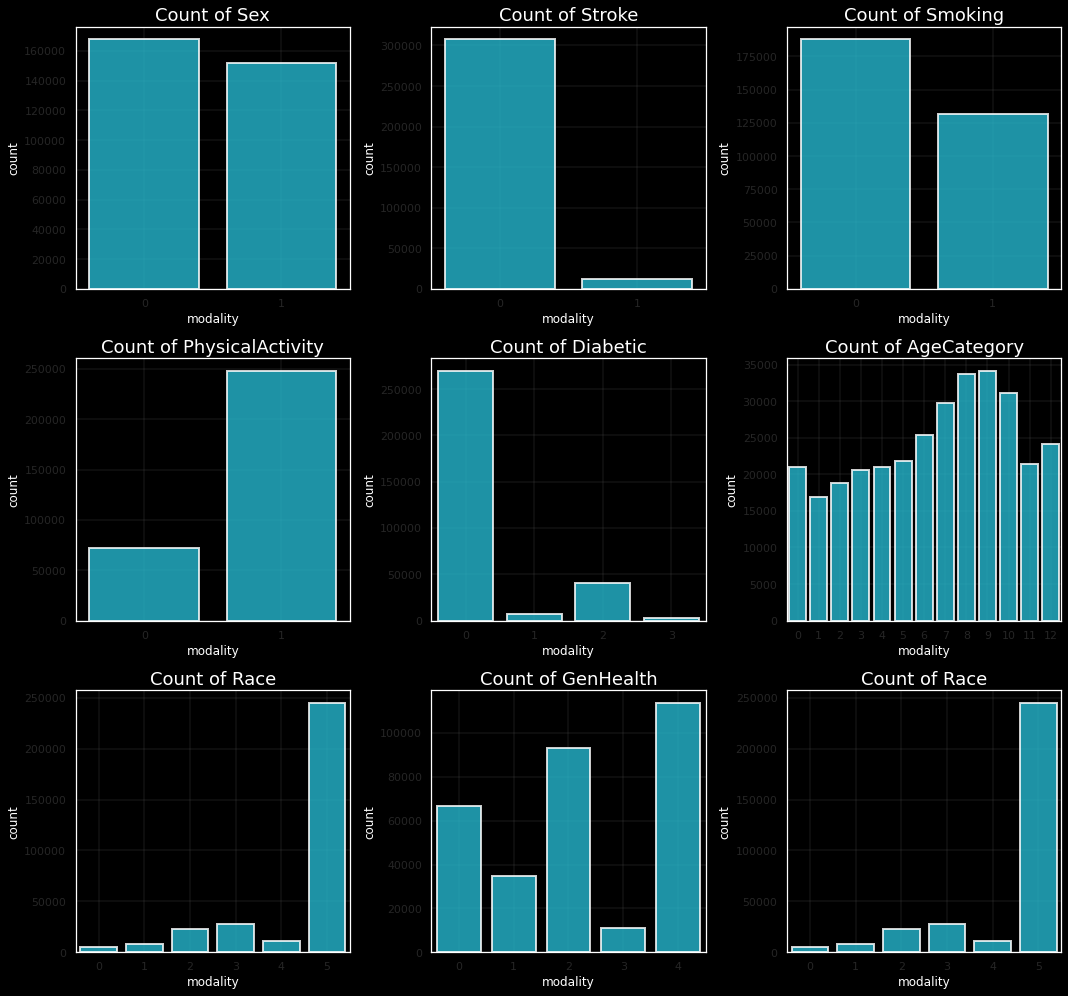

In [ ]:
# visual 5 : Categorical data
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
f,ax=plt.subplots(3,3,figsize=(15,14))

for i,feature in enumerate(['Sex', 'Stroke', 'Smoking', 'PhysicalActivity', 'Diabetic','AgeCategory', 'Race', 'GenHealth', 'Race'  ]):
    colors = ['#0ACDEB']
    sns.countplot(x=feature,data = heart,ax=ax[i//3,i%3], palette = colors, alpha=0.8, edgecolor=('white'), linewidth=2)
    ax[i//3,i%3].grid(b=True, which='major', color='grey', linewidth=0.2)
    ax[i//3,i%3].set_title('Count of {}'.format(feature), color= 'white', fontsize=18)
    ax[i//3,i%3].set_ylabel('count', color= 'white', fontsize=12)
    ax[i//3,i%3].set_xlabel('modality',color= 'white', fontsize=12)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Heart Disease Frequency')

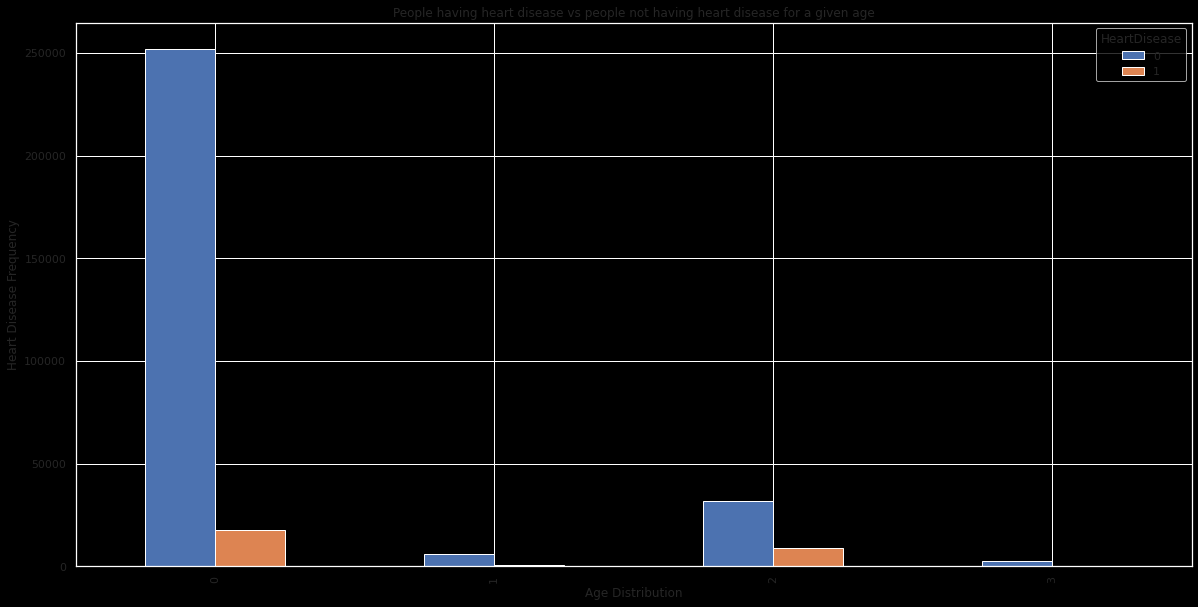

In [ ]:
#Visual 6
#Analyzing heart disease over age distribution

pd.crosstab(heart.Diabetic, heart.HeartDisease).plot(kind='bar', figsize=(20, 10))
plt.title("People having heart disease vs people not having heart disease for a given age")
plt.xlabel("Age Distribution")
plt.ylabel("Heart Disease Frequency")

###ML - model  (class predict) 

In [ ]:

#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(214262, 17)
(105533, 17)
(214262,)
(105533,)


MODEL 1. Decision Tree Classifier

In [ ]:


Dtree_clf = DecisionTreeClassifier(random_state=60)
#fit:function do training (known data)
Dtree_clf.fit(X_train.values, y_train)
#pridict:function do test(unknown data)
pred_Dtree = Dtree_clf.predict(X_test.values)

print("Accuracy Score: ", accuracy_score(y_test, pred_Dtree) * 100,"%")
print("Classification Report: \n", classification_report(y_test, pred_Dtree))



Accuracy Score:  86.3180237461268 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     96529
           1       0.23      0.25      0.24      9004

    accuracy                           0.86    105533
   macro avg       0.58      0.59      0.58    105533
weighted avg       0.87      0.86      0.87    105533



In [ ]:
pred_Dtree

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,11,2,0,0,1,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10,5,0,1,1,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12,5,2,0,2,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12,5,1,0,1,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9,5,0,1,2,10,0,0,0


In [ ]:
#test case  1

input=(30,1,0,0,3.0,0.0,1,1,10,5,0,0,3,10.0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=Dtree_clf.predict(input_reshaped)
if(pre1==1): 
  print("You might at the risk of heart disease")
else:
  print("You are heart healthy")
  

You might at the risk of heart disease


In [ ]:
#test case  2

input=(15,1,0,0,3.0,0.0,0,0,10,5,0,0,3,10.0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=Dtree_clf.predict(input_reshaped)
if(pre1==1): 
 print("You might at the risk of heart disease")
else:
  print("You are heart healthy")
  
  

You are heart healthy


# Interactive User - Interface (UI)

In [ ]:
#@title Are you in danger of heart disease ? { run: "auto", vertical-output: true, form-width: "100%", display-mode: "form" }

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, FloatSlider, Text, Combobox, Checkbox, Select




Name = widgets.Text(value='',placeholder='Type your Name',disabled=False)
Gender = widgets.Dropdown(options=[('Female', 0), ('Male', 1)], value = 0)
Age_gr = widgets.Dropdown(options=[('18-24', 0), ('25-29', 1), ('30-34', 2), ('35-39', 3), ('40-44', 4), ('45-49', 5), ('50-54', 6), ('55-59', 7), ('60-64', 8), ('65-69', 9), ('70-74', 10), ('75-79', 11), ('80 or older', 12)], value = 0)
Race =  widgets.Dropdown(options=[('American Indian/Alaskan Native', 0), ('Asian', 1), ('Black', 2), ('Hispanic', 3), ('Other', 4), ('White', 5)], value = 0)



Diff_walk = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
Smoke = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
Alcohol = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
Stroke = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
Asthma = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)

Diabeties = widgets.Dropdown(options=[('No', 0), ('No, borderline diabetes', 1), ('Yes', 2), ('Yes (during pregnancy)', 3)], value = 0)
Kidney_dis = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
Skin_can = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)

PH_Act =   widgets.Dropdown(options=[('No', 0), ('Yes', 1)], value = 0)
gen_hlth =  widgets.Dropdown(options=[('Excellent', 0), ('Fair', 1), ('Good', 2), ('Poor', 3), ('Very good', 4)], value = 0)

BMI = widgets.FloatSlider(min=00, max=100, step = 0.01, value=25, readout=True)
Sleep =  widgets.IntSlider(min=4, max=15, readout=True, value=7)
phy_hlth = widgets.IntSlider(min=00, max=30, readout=True, value=15)
ment_hlth =  widgets.IntSlider(min=00, max=30, readout=True, value=15)





name_lbl =  widgets.Label(value="Enter your Name ")
gen_lbl =  widgets.Label(value="Select your gender : ")
race_lbl = widgets.Label(value="Select your Race : ")
Agegr_lbl = widgets.Label(value="Select your Age Group : ")
wd_lbl = widgets.Label(value="Do yo have difficulties walking  ? ")
sm_lbl = widgets.Label(value="Do you smoke ? ")
alch_lbl = widgets.Label(value="Do you consume alcohole ?")
stroke_lbl = widgets.Label(value="Do you ever had stroke ? ")
asth_lbl = widgets.Label(value="Do you have/ ever had asthma ?")
diab_lbl = widgets.Label(value="Are you diabetic ? ")
kd_lbl = widgets.Label(value="Do you have/ ever had any kidney related diseases ? ")
skind_lbl = widgets.Label(value="Do you have/ ever had skin cancer ?")
bmi_lbl = widgets.Label(value="What is your current BMI ?")
sleep_lbl = widgets.Label(value="On avarage, how many hours you sleep per day  ? ")
ph_lbl = widgets.Label(value="On the scale of 0 to 30 , how much do you rate your physical health ? ")
mh_lbl = widgets.Label(value="On the scale of 0 to 30 , how much do you rate your mental health ? ")

PH_Act_lbl = widgets.Label(value="Do you do physical activities ?")
gen_hlth_lbl = ph_lbl = widgets.Label(value="Which of following describes your overall genral health best ? ")





def on_button_clicked(_):

    user_input = ([[BMI.value, Smoke.value, Alcohol.value, Stroke.value, phy_hlth.value, ment_hlth.value,  Diff_walk.value, Gender.value,  Age_gr.value, Race.value,  Diabeties.value, PH_Act.value, gen_hlth.value, Sleep.value, Asthma.value, Kidney_dis.value, Skin_can.value]])
    input_numpy = np.asarray(user_input)
    input_2d =input_numpy.reshape(1,-1)
    result = Dtree_clf.predict(input_2d)

    if(result==1): 
        print("Based on your demographics above")
        result_text = widgets.HTML(value = f"<b><font color='red'>{'You might at the risk of heart disease'}</b>")
        display(result_text)
    else:
        print("Based on your demographics above")
        result_text = widgets.HTML(value = f"<b><font color='green'>{'You seems to be heart healthy'}</b>")
        display(result_text)
    # what happens when we press the button
    with output:
        output.clear_output()
        #print(Name.value, "Your Inputs are :  ",  user_input)
        #print("--Prediction--")
        # print("the value of result is", result)
    return


calc_button = widgets.Button(description='SUMBIT', button_style='success', layout = Layout(margin='70px'))
output = widgets.Output()

# Link button and function together using button method
calc_button.on_click(on_button_clicked)


# Link button and function together using button method
calc_button.on_click(on_button_clicked)







widget_box = widgets.VBox([
                           
                    HBox([ VBox([name_lbl,Name], layout = Layout(margin='10px')),
                           VBox([race_lbl, Race], layout = Layout(margin='10px'))], layout = Layout(width='40%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),


                    HBox([ VBox([gen_lbl,Gender], layout = Layout(margin='10px')),
                           VBox([Agegr_lbl, Age_gr], layout = Layout(margin='10px'))], layout = Layout(width='40%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),



                    HBox([ VBox([alch_lbl, Alcohol], layout = Layout(margin='10px')), 
                           VBox([sm_lbl, Smoke], layout = Layout(margin='10px'))], layout = Layout(width='40%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),



                    HBox([ VBox([asth_lbl, Asthma], layout = Layout(margin='10px')),
                           VBox([diab_lbl,  Diabeties], layout = Layout(margin='10px'))], layout = Layout(width='40%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),


                    HBox([ VBox([kd_lbl, Kidney_dis], layout = Layout(margin='10px')),
                           VBox([skind_lbl, Skin_can], layout = Layout(margin='10px')),
                           VBox([stroke_lbl, Stroke], layout = Layout(margin='10px'))], layout = Layout(width='64%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),



                           VBox([bmi_lbl, BMI], layout = Layout(margin='20px')),
                           VBox([sleep_lbl,  Sleep], layout = Layout(margin='20px')),  

                    
                    HBox([ VBox([wd_lbl, Diff_walk], layout = Layout(margin='10px')),
                           VBox([PH_Act_lbl, PH_Act], layout = Layout(margin='10px')),
                           VBox([gen_hlth_lbl, gen_hlth], layout = Layout(margin='10px'))], layout = Layout(width='64%', margin = '15px', display = 'flex',flex_flow='row', justify_content='space-between')),


                           VBox([ph_lbl, phy_hlth], layout = Layout(margin='20px')),
                           VBox([mh_lbl, ment_hlth], layout = Layout(margin='20px')),
                           calc_button,
                           VBox([output], layout = Layout(margin='20px')), ], layout = Layout(width='80%',  display = 'flex',flex_flow='column'))



children = [widget_box]
UI= widgets.HBox()
UI.children = children

#SHOW
UI

